In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
import matplotlib.pyplot as plt
import os
np.random.seed(42)

In [2]:
filePath = "/cxldata/datasets/project/bikes.csv"

In [3]:
bikesData = pd.read_csv(filePath)

In [4]:
bikesData.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
bikesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [6]:
bikesData.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [7]:
bikesData

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [8]:
help(bikesData)

Help on DataFrame in module pandas.core.frame object:

class DataFrame(pandas.core.generic.NDFrame)
 |  Two-dimensional size-mutable, potentially heterogeneous tabular data
 |  structure with labeled axes (rows and columns). Arithmetic operations
 |  align on both row and column labels. Can be thought of as a dict-like
 |  container for Series objects. The primary pandas data structure.
 |  
 |  Parameters
 |  ----------
 |  data : ndarray (structured or homogeneous), Iterable, dict, or DataFrame
 |      Dict can contain Series, arrays, constants, or list-like objects
 |  
 |      .. versionchanged :: 0.23.0
 |         If data is a dict, column order follows insertion-order for
 |         Python 3.6 and later.
 |  
 |      .. versionchanged :: 0.25.0
 |         If data is a list of dicts, column order follows insertion-order
 |         Python 3.6 and later.
 |  
 |  index : Index or array-like
 |      Index to use for resulting frame. Will default to RangeIndex if
 |      no indexing i

In [9]:
dir(bikesData['yr'])

['T',
 '_AXIS_ALIASES',
 '_AXIS_IALIASES',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__long__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__p

In [10]:
bikesData['yr'].unique()

array([0, 1])

In [11]:
bikesData.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [12]:
columnsToDrop = ['dteday','atemp','registered','casual','instant']

In [13]:
bikesData = bikesData.drop(columnsToDrop,axis=1)

In [14]:
np.random.seed(42)

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
bikesData['dayCount'] = pd.Series(range(bikesData.shape[0]))/24

In [17]:
train_set, test_set = train_test_split(bikesData, test_size=0.3, random_state=42)

In [18]:
train_set.sort_values('dayCount', axis= 0, inplace=True)
test_set.sort_values('dayCount', axis= 0, inplace=True)

/usr/local/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [19]:
print(len(train_set), "train +", len(test_set), "test")

12165 train + 5214 test


In [20]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [21]:
columnsToScale = ['temp', 'hum', 'windspeed']

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()

In [24]:
train_set[columnsToScale] = scaler.fit_transform(train_set[columnsToScale])

/usr/local/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [25]:
test_set[columnsToScale] =scaler.transform(test_set[columnsToScale])

/usr/local/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [26]:
train_set[columnsToScale].mean()

temp         1.658955e-15
hum          4.775031e-17
windspeed   -1.367550e-15
dtype: float64

In [27]:
train_set[columnsToScale].std()

temp         1.000041
hum          1.000041
windspeed    1.000041
dtype: float64

In [28]:
train_set[columnsToScale].describe()

,temp,hum,windspeed
count,1.216500e+04,1.216500e+04,1.216500e+04
mean,1.658955e-15,4.775031e-17,-1.367550e-15
std,1.000041e+00,1.000041e+00,1.000041e+00
min,-2.476000e+00,-3.245965e+00,-1.552670e+00
25%,-8.186290e-01,-7.628859e-01,-6.962541e-01
50%,1.005628e-02,1.307622e-02,-2.069907e-01
75%,8.387416e-01,8.407692e-01,5.264946e-01
max,2.599698e+00,1.927116e+00,5.419128e+00


In [29]:
test_set[columnsToScale].describe()

,temp,hum,windspeed
count,5214.000000,5214.000000,5214.000000
mean,-0.018492,-0.004197,0.017498
std,0.990859,0.993451,1.008611
min,-2.476000,-3.245965,-1.552670
25%,-0.818629,-0.762886,-0.696254
50%,0.010056,0.013076,0.037231
75%,0.735156,0.789038,0.526495
max,2.392526,1.927116,5.419128


In [30]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [31]:
from xgboost import XGBRegressor

In [32]:
trainingCols = train_set.drop('cnt', axis=1)

In [33]:
trainingLabels = train_set['cnt'].copy()

In [34]:
dec_reg = DecisionTreeRegressor(random_state=42)

In [35]:
dt_mae_scores = -cross_val_score(dec_reg, trainingCols, 
                                 trainingLabels, cv=10,
                                scoring="neg_mean_absolute_error")
display_scores(dt_mae_scores)

Scores: [42.94494659 50.37222679 36.95891537 44.26211997 46.99589154 71.98026316
 58.19901316 48.87417763 50.84868421 96.46217105]
Mean: 54.7898409457034
Standard deviation: 16.563759407187572


In [43]:
dt_mse_scores = np.sqrt(-cross_val_score(dec_reg, trainingCols, 
                                 trainingLabels, cv=10,
                                scoring="neg_mean_squared_error"))
display_scores(dt_mse_scores)

Scores: [ 65.39786583  77.67402864  60.57274567  73.73250527  75.48574011
 113.22922285  96.5884429   82.11639785  86.86752618 149.13680359]
Mean: 88.0801278896052
Standard deviation: 24.927341207369675


In [39]:
lin_reg = LinearRegression()

In [40]:
lr_mae_scores = -cross_val_score(lin_reg, trainingCols,
                                 trainingLabels, cv=10,
                                 scoring="neg_mean_absolute_error")
display_scores(lr_mae_scores)

Scores: [ 66.96340699  80.48809095 113.84704981  93.17230086  76.11197672
  96.5220689  133.13798218 158.02254734 158.90195479 127.15674717]
Mean: 110.43241256942255
Standard deviation: 31.426965705295334


In [42]:
lr_mse_scores = np.sqrt(-cross_val_score(lin_reg, trainingCols,
                                 trainingLabels, cv=10,
                                 scoring="neg_mean_squared_error"))
display_scores(lr_mse_scores)

Scores: [ 84.63836676 111.12038541 131.88324414 119.16350622 105.17621319
 127.72562924 174.97188817 187.31691741 205.60028279 164.30585678]
Mean: 141.19022901181802
Standard deviation: 37.55565075919532


In [51]:
forest_reg = RandomForestRegressor(random_state=42, n_estimators=150)

In [52]:
rf_mae_scores = -cross_val_score(forest_reg, trainingCols,
                                 trainingLabels, cv=10,
                                 scoring="neg_mean_absolute_error")
display_scores(rf_mae_scores)

Scores: [33.39666393 33.54451931 28.50225692 31.78826623 36.55658724 57.81963268
 40.96405702 40.84652961 37.57766447 84.69771382]
Mean: 42.56938912059061
Standard deviation: 15.980256848600963


In [53]:
rf_mse_scores = np.sqrt(-cross_val_score(forest_reg, trainingCols,
                                 trainingLabels, cv=10,
                                 scoring="neg_mean_squared_error"))
display_scores(rf_mse_scores)

Scores: [ 45.64176074  50.97205843  43.37588352  52.2640926   60.46557726
  94.24478873  66.26045287  65.45672124  61.69916554 131.9727285 ]
Mean: 67.23532294382946
Standard deviation: 25.544513111074128


In [58]:
from sklearn.model_selection import GridSearchCV

In [64]:
param_grid = [{'n_estimators':[120,150],'max_features': [10, 12], 
               'max_depth': [15, 28]}]

In [69]:
grid_search = GridSearchCV(forest_reg, param_grid,
                          cv=5,scoring="neg_mean_squared_error")

In [72]:
grid_search.fit(trainingCols, trainingLabels)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=150, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [73]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=28, max_features=10, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=150, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [74]:
grid_search.best_params_

{'max_depth': 28, 'max_features': 10, 'n_estimators': 150}

In [79]:
feature_importances = grid_search.best_estimator_.feature_importances_

In [80]:
print(feature_importances)

[0.00424888 0.00145493 0.00570279 0.58348648 0.00215107 0.01790669
 0.06993018 0.01688336 0.09373438 0.03176755 0.00907719 0.16365649]


In [84]:
final_model = grid_search.best_estimator_

In [85]:
test_set.sort_values('dayCount', axis= 0, inplace=True)

/usr/local/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [87]:
test_x_cols = test_set.drop('cnt', axis=1).columns.values

In [100]:
test_y_cols = 'cnt'

In [89]:
X_test = test_set.loc[ : , test_x_cols]

In [92]:
y_test = test_set['cnt']

In [108]:
test_set.loc[:,'predictedCounts_test'] = final_model.predict(X_test)

/usr/local/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [109]:
mse = mean_squared_error(y_test, test_set.loc[:,'predictedCounts_test'])

In [110]:
final_mse = np.sqrt(mse)

In [111]:
print(final_mse)

39.47930005837265


In [112]:
test_set 

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,dayCount,predictedCounts_test
0,1,0,1,0,0,6,0,1,-1.336557,0.944231,-1.552670,16,0.000000,35.973333
3,1,0,1,3,0,6,0,1,-1.336557,0.633846,-1.552670,13,0.125000,10.873333
5,1,0,1,5,0,6,0,2,-1.336557,0.633846,-0.818365,1,0.208333,4.680000
8,1,0,1,8,0,6,0,1,-1.336557,0.633846,-1.552670,8,0.333333,21.013333
14,1,0,1,14,0,6,0,2,-0.197115,0.478654,0.771536,106,0.583333,120.186667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17354,1,1,12,23,0,0,0,1,-1.543729,-0.607694,0.282273,49,723.083333,39.900000
17355,1,1,12,0,0,1,1,1,-1.647314,-0.400770,0.037231,34,723.125000,40.466667
17367,1,1,12,12,0,1,1,2,-1.336557,-0.349039,0.037231,224,723.625000,172.146667
17375,1,1,12,20,0,1,1,2,-1.232972,-0.142116,-0.206991,89,723.958333,96.440000


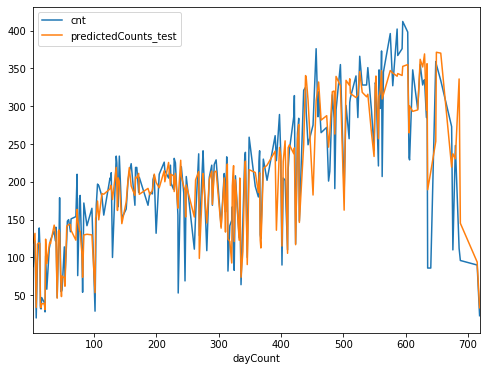

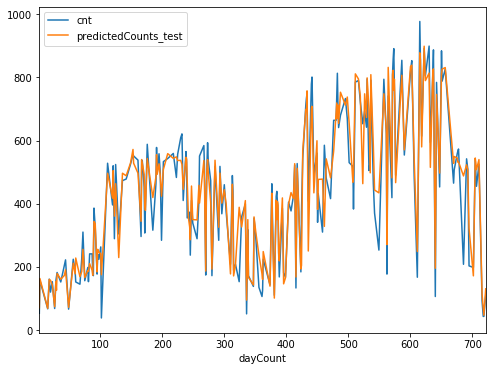

In [113]:
times = [9,18]
for time in times:
    fig = plt.figure(figsize=(8, 6))
    fig.clf()
    ax = fig.gca()
    test_set_freg_time = test_set[test_set.hr == time]
    test_set_freg_time.plot(kind = 'line', x = 'dayCount', y = 'cnt', ax = ax)
    test_set_freg_time.plot(kind = 'line', x = 'dayCount', y = 'predictedCounts_test', ax =ax)
    plt.show()